# Importing libraries

In [213]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#from pycaret.regression import setup, compare_models
from sklearn.model_selection import KFold, cross_val_score

In [214]:
df = pd.read_csv("Data/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [215]:
attributes = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

# Data visualization

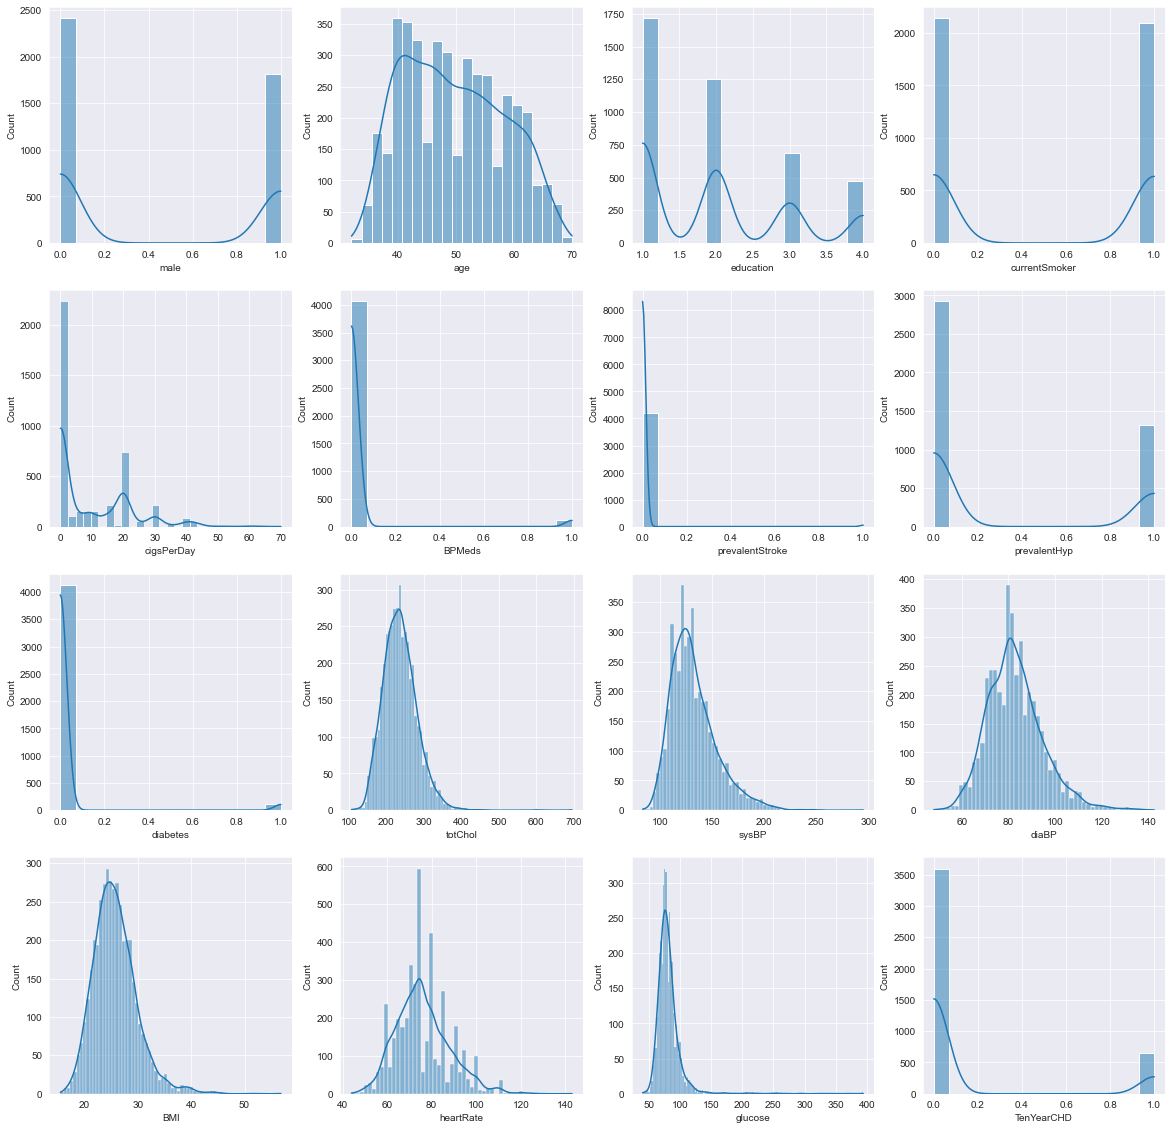

In [216]:
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.histplot(df[attributes[i-1]],kde=True)

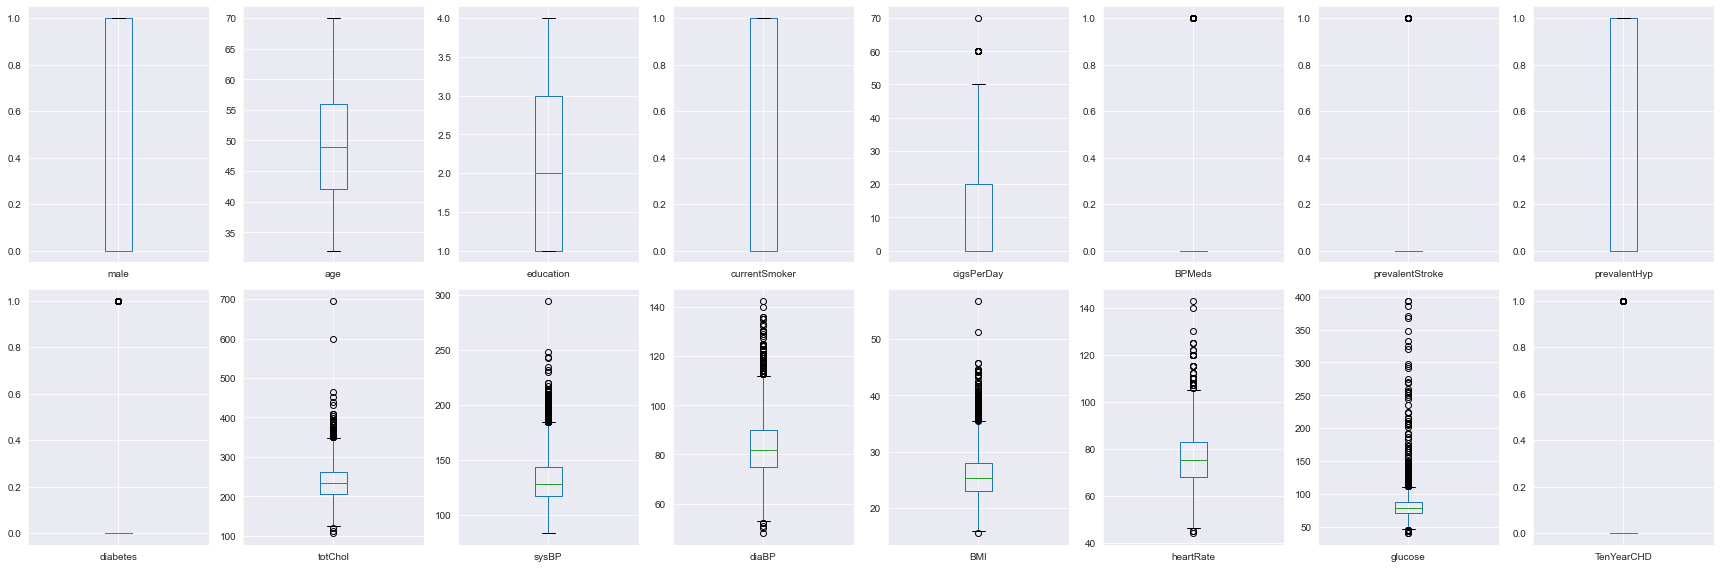

In [217]:
fg, ax = plt.subplots(2,8,figsize=(24,8))

# for i, el in enumerate(list(df.columns.values)):
for col, i in zip(attributes, range (len(df[attributes]))):
    a = df.boxplot(col, ax=ax.flatten()[i])
plt.tight_layout() 

# Data cleaning

In [218]:
treating_feature = ['cigsPerDay' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

In [219]:
for i in treating_feature:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

### Droping columns

In [220]:
df.dropna(inplace=True)

In [221]:
X = df.drop(["TenYearCHD"],axis=1)

In [222]:
y = df["TenYearCHD"]
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [223]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


<AxesSubplot:xlabel='diabetes', ylabel='count'>

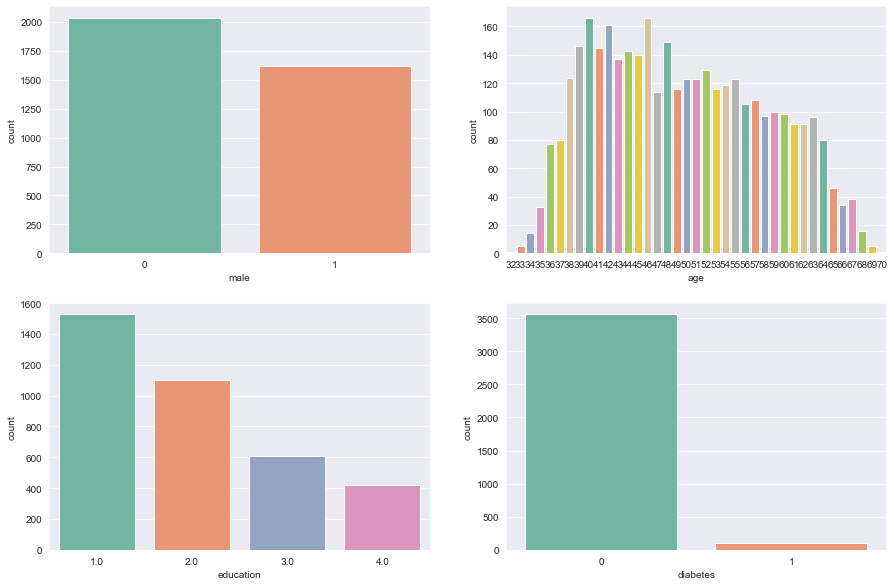

In [236]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.countplot(data = df, x = 'male', palette='Set2' )

plt.subplot(2,2,2)
sns.countplot( data = df, x = 'age', palette='Set2')

plt.subplot(2,2,3)
sns.countplot(data = df, x = 'education', palette='Set2')

plt.subplot(2,2,4)
sns.countplot(data = df, x = 'diabetes', palette='Set2')

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

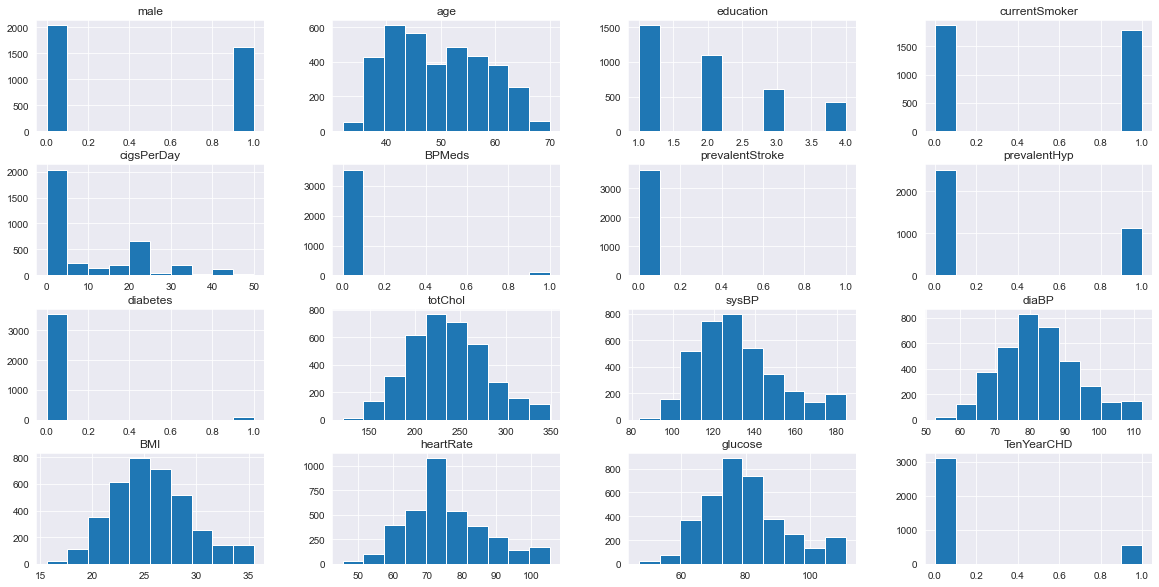

In [239]:
df.hist(figsize = (20,10))

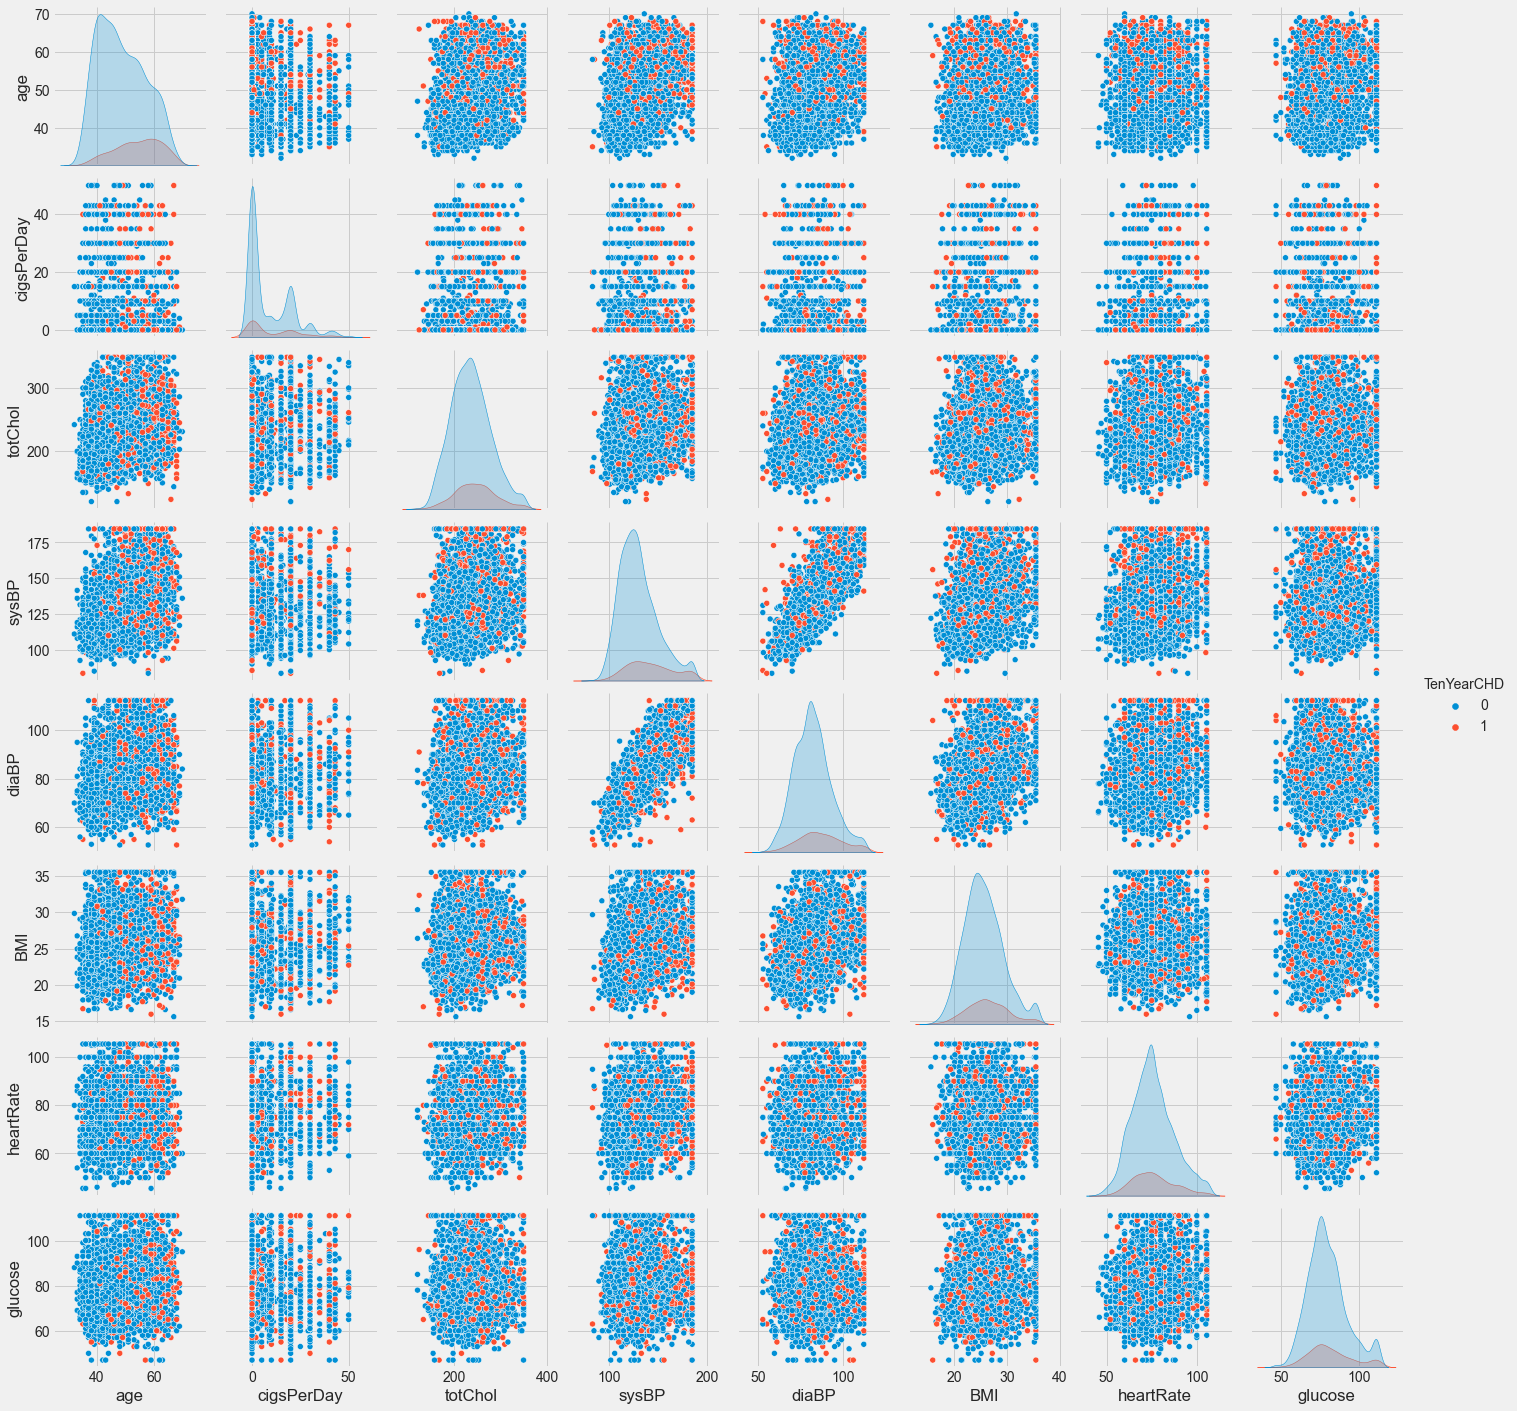

In [242]:
plt.style.use('fivethirtyeight')

sns.pairplot(df , hue = 'TenYearCHD',
             vars = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose'])
plt.show()

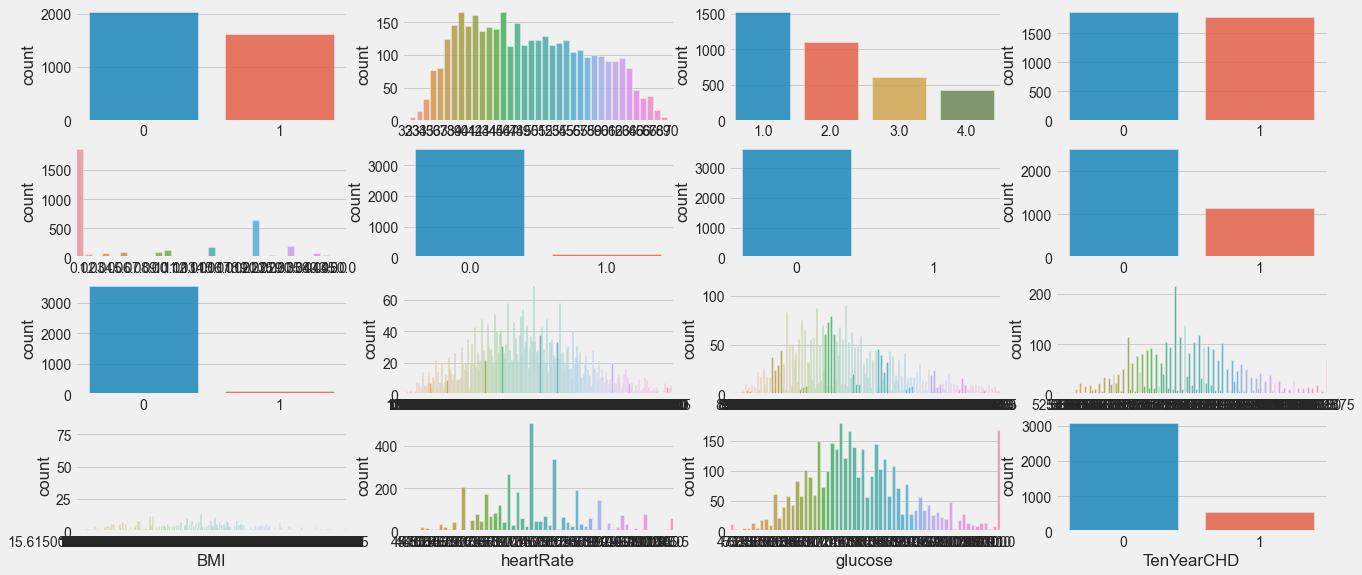

In [246]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in attributes:
    n += 1
    plt.subplot(4 , 4 , n)
    sns.countplot(x = f , data = df , alpha = 0.85)

Text(0.5, 0, 'Heart Attack risk')

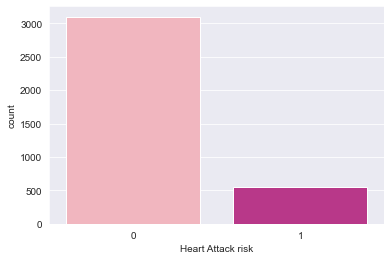

In [224]:
sns.countplot(x = y, palette= 'RdPu')
plt.xlabel('Heart Attack risk')

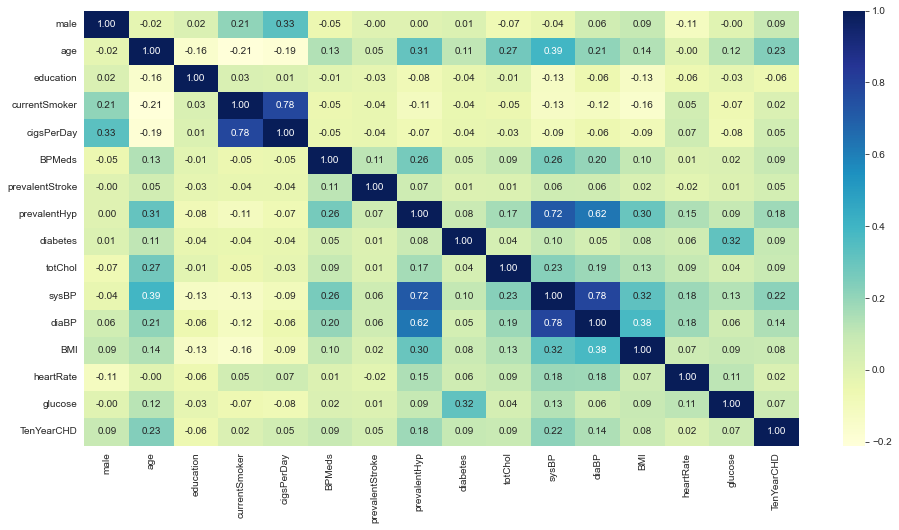

In [225]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

# Feature Scaling

In [226]:
sc = MinMaxScaler()
X= sc.fit_transform(X)
X= pd.DataFrame(X)

In [227]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.184211,1.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.326754,0.222772,0.290966,0.571177,0.575000,0.468750
1,0.0,0.368421,0.333333,0.0,0.00,0.0,0.0,0.0,0.0,0.567982,0.371287,0.475840,0.659708,0.825000,0.453125
2,1.0,0.421053,0.000000,1.0,0.40,0.0,0.0,0.0,0.0,0.546053,0.435644,0.459034,0.489185,0.491667,0.359375
3,0.0,0.763158,0.666667,1.0,0.60,0.0,0.0,1.0,0.0,0.458333,0.658416,0.711134,0.652163,0.325000,0.875000
4,0.0,0.368421,0.666667,1.0,0.46,0.0,0.0,0.0,0.0,0.721491,0.460396,0.526261,0.376509,0.658333,0.593750


# Data spliting

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Logistic Regression

In [233]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

In [247]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
2217,0,0
1547,0,0
621,0,0
3143,1,0
1900,0,0
...,...,...
1768,0,0
2363,0,0
2508,0,0
1650,0,0


In [249]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       622
           1       0.60      0.05      0.10       110

    accuracy                           0.85       732
   macro avg       0.73      0.52      0.51       732
weighted avg       0.82      0.85      0.80       732



### Prediction

In [234]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[618   4]
 [104   6]]


0.8524590163934426

<AxesSubplot:>

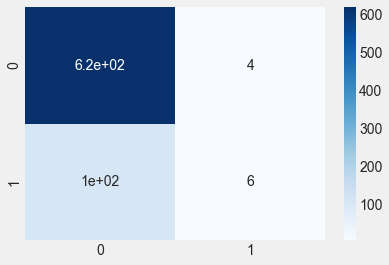

In [252]:
sns.heatmap(cm, cmap ='Blues', annot = True)

In [251]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(lr, X, y, cv = k_folds)

print("Average CV Score: ", scores.mean())

Average CV Score:  0.8503872231317231
